# Power Generation Unit Optimisation

Our task is to optimize the performance of the power generation unit for the next 24 hours so that we maximize profit (sell the electricity at the highest possible price):

- each hour will be represented as a constant power level
- the minimum power output is 40 MW and the maximum power output is 180 MW
- the average power must be 80 MW
- Due to grid limitations, the average power over the first ten hours must be 50MW
- due to generation unit technology limitations, the power change per hour shall not exceed 20 MW (bothways)

Furthermore, we assume the price curve is known in advance (prepared in variable `price`).

In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
price = np.array([200, 160, 205, 210, 150, 180, 550, 600,
                  400, 330, 160, 150, 160, 150, 350, 200, 
                  380, 500, 550, 210, 230, 200, 190, 180.,]) # price for every hour in CZK

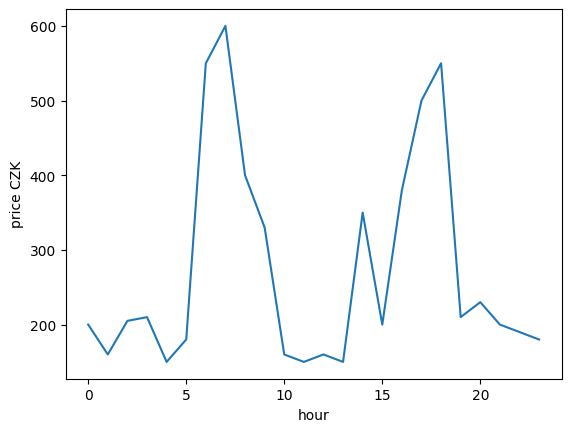

In [5]:
plt.plot(price)
plt.xlabel("hour")
plt.ylabel("price CZK")
plt.show()

In [9]:
power = cp.Variable(24) 
constraints = [
    cp.sum(power) == 24 * 80.0, # average power
    cp.sum(power[:10]) == 10 * 50, # average power first 10 hours
    power >= 40., # minimal MW for block
    power <=180., # maximal MW for block
    power[1:] - power[:-1] <= 20.0, # change less then 20 MW one way
    power[:-1] - power[1:] <= 20.0, # change less then 20 MW other way
]
profit = cp.sum(cp.multiply(power, price))
objective = cp.Maximize(profit)
problem = cp.Problem(objective, constraints)
problem.solve(verbose=True, solver=cp.ECOS)

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Nov 30 12:20:47 PM: Your problem has 24 variables, 6 constraints, and 0 parameters.
(CVXPY) Nov 30 12:20:47 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 30 12:20:47 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 30 12:20:47 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 30 12:20:47 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 30 12:20:47 PM: Compiling problem (target solver=ECOS).
(CVX

593793.8461484844

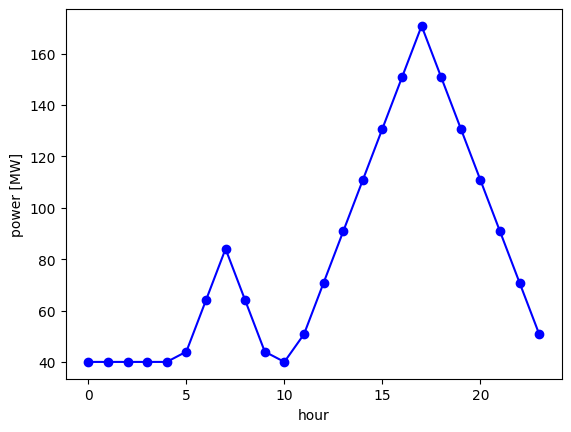

In [10]:
plt.plot(power.value, "b-o")
plt.xlabel("hour")
plt.ylabel("power [MW]")
plt.show()